# Setup

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Load the data
df = pd.read_csv('./data/bitcoin_price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Time Series Index

In [38]:
# Exmaple of changing the date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# Set Date to be the index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [39]:
# Select the data
df.loc['2017-01-01':'2017-1-7']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,902.200989,351876000
2017-01-07,903.487000,908.585022,823.556030,908.585022,908.585022,279550016


In [40]:
# Load and set index
df = pd.read_csv('./data/bitcoin_price.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Resample Data

In [41]:
# Resample the data to weekly, and take the mean
df.resample('W').mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,429.916998,437.718195,406.624402,416.859003,416.859003,3.138068e+07
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07


# Explore Data

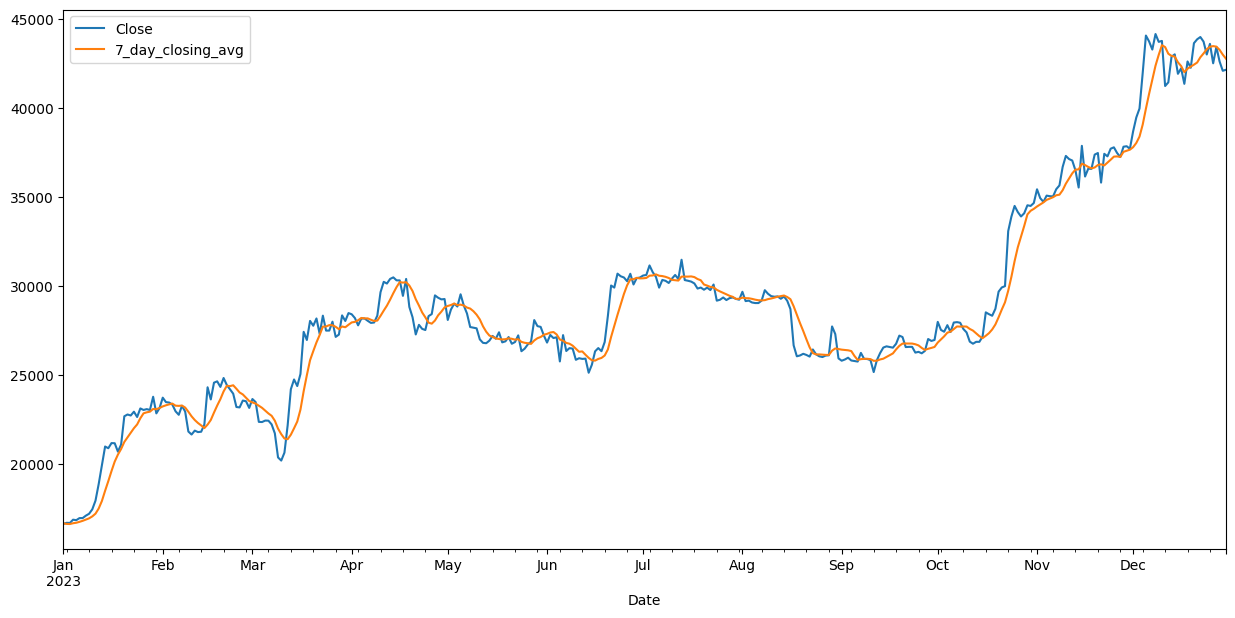

In [ ]:
# 7-day rolling average for close price
# rolling average of window 7 means that the average is calculated for the current day and the 6 days before it
df['7_day_closing_avg'] = df['Close'].rolling(window=7).mean()
df[['Close', '7_day_closing_avg']].loc['2023'].plot(figsize=(15, 7))
plt.show()

In [54]:
# Find the month with the highest average closing price
df.resample('ME').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

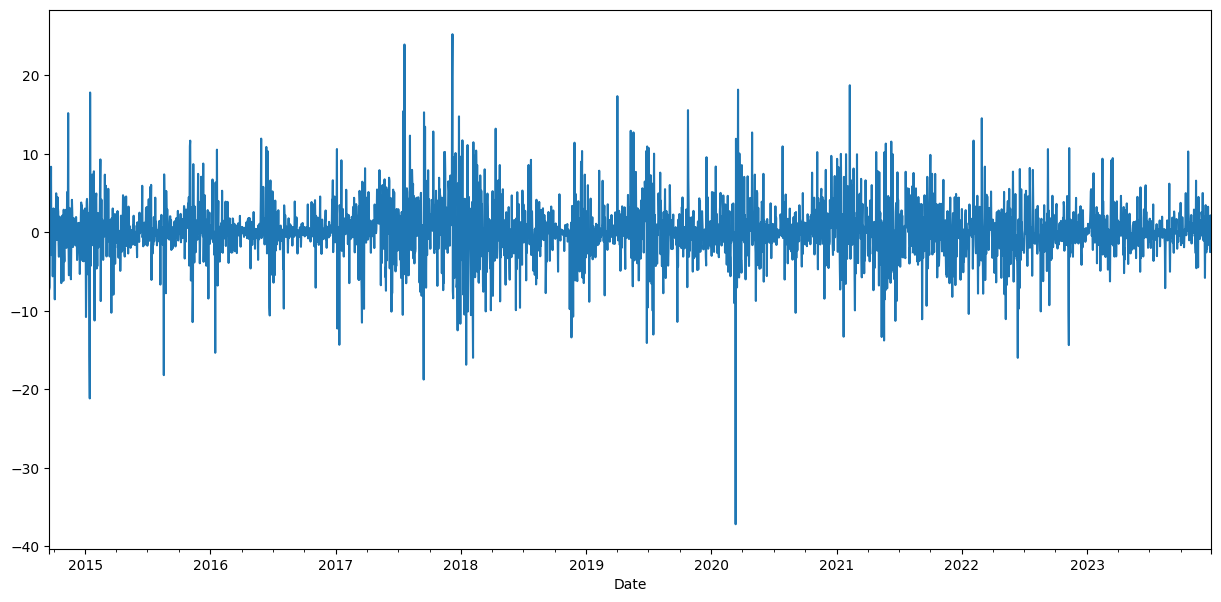

In [52]:
# Compute percentage change
df['change'] = df['Close'].pct_change().mul(100)
df.head()

# Plot the percentage change
df['change'].plot(figsize=(15, 7))
plt.show()

In [53]:
# Select change that is greater than 10%
df[abs(df['change']) > 10]

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,change
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,10.612188
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-10.006132
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-14.349022
